<img src='img_notebook/kpmgimg1.png' width = 300>

# VIX - Data Analytics KPMG TASK-1
**by: Kintan Pitaloka Winasih**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [4]:
#read dataset
df_custdemo= pd.read_csv('csv1/Customerdemographic.csv', delimiter=';', low_memory=False)
df_custadd = pd.read_csv('csv1/CustomerAddres.csv', delimiter=';', low_memory=False)
df_trans = pd.read_csv('csv1/Transactions.csv', delimiter=';', low_memory=False)

# Data Understanding

## Customer Demographic

In [5]:
df_custdemo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,23/10/1931,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,22/08/1935,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,22/09/1940,NaN,Property,Mass Customer,N,á,No,16.0


In [6]:
df_custdemo.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3272,2607,Laurent,Ainslee,Male,90,08/05/1992,Registered Nurse,Health,Affluent Customer,N,!@#$%^&*(),Yes,7.0
1329,2675,Dayle,Girardetti,Female,24,25/02/1973,Media Manager IV,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,7.0
682,203,Donovan,Conry,Male,71,13/01/1964,Senior Quality Engineer,Argiculture,Mass Customer,N,âð¿ ðªð¿ ðð¿ ðð¿ ðð¿ ðð¿,Yes,11.0


In [7]:
df_custdemo.shape

(4000, 13)

In [8]:
df_custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [9]:
df_custdemo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [10]:
# Checking unique value from each columns
for col in df_custdemo.columns:
    print("{} have {} unique values: {}".format(col, df_custdemo[col].nunique(), df_custdemo[col].dtypes))
    if df_custdemo[col].dtypes == 'int64' or df_custdemo[col].dtypes == 'float' or df_custdemo[col].dtypes == 'object':
        print("{} values: {}".format(col,df_custdemo[col].unique()))
        print('')

customer_id have 4000 unique values: int64
customer_id values: [ 720 1092 3410 ... 3931 3935 3998]

first_name have 3139 unique values: object
first_name values: ['Darrel' 'Katlin' 'Merrili' ... 'Eba' 'Nissa' 'Sarene']

last_name have 3725 unique values: object
last_name values: ['Canet' 'Creddon' 'Brittin' ... 'Epine' 'Alfonsini' 'Woolley']

gender have 6 unique values: object
gender values: ['Male' 'Female' 'F' 'Femal' 'M' 'U']

past_3_years_bike_related_purchases have 100 unique values: int64
past_3_years_bike_related_purchases values: [67 56 93 27 38 73 71 47 95 51 48 21  1 40  5 97 74 89 60 24  2  7 61  8
 44 19 23 82 29 77 20 22 72 99 41  9 59 79 81 49 98 54 53 10 16 55 62 90
 34 15 50 92  6 78 35 75 69 70 64 45 12 31 76 33 96 17  0 37 13 42 30 88
 36 66 25 11 57 14 18 83 68 28 52 80 26 43  4 65 86 32 39 63 84 87  3 91
 94 85 46 58]

DOB have 3448 unique values: object
DOB values: ['23/10/1931' '22/08/1935' '22/09/1940' ... '11/03/2002' '1843-12-21' nan]

job_title have 195 uniqu

In [11]:
# checking the numerical data
nums = df_custdemo.loc[:, (df_custdemo.dtypes == 'int64') | (df_custdemo.dtypes == float)].columns.tolist()
print(nums)
print('Counts :', len(nums))

['customer_id', 'past_3_years_bike_related_purchases', 'tenure']
Counts : 3


In [12]:
# categorical data
cats = df_custdemo.loc[:, (df_custdemo.dtypes == object)].columns.tolist() 
print(cats)
print('Counts :', len(cats))

['first_name', 'last_name', 'gender', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car']
Counts : 10


🔎 **summary:**

- any **4000 record data, and 13 columns**
- any **3 numerical columns : customer_id ,past_3_years_bike_related_purchases, tenure**
- any 4 categorical columns : **first_name, last_name, gender, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, default, owns_car**
- There are any **irrelevant** columns that need to be dropped, such as **default**.
- There are any **inconsistent values** in the **gender** column, so it needs to be treated.
- **deceased_indicator** and **owns_car values** column are suggested be **Boolean**. The value **'Y'** in **deceased_indicator** are **not current** customers and recomended to deleted these records because we want only live customers.


## Check Missing Values

In [13]:
df_custdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [14]:
# percentages missing value of dataset
nan_df = df_custdemo[df_custdemo.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_custdemo)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 34.25 %


In [15]:
# checking missing value of each columns
counts = df_custdemo.isna().sum().sort_values(ascending=False)

# percentages of missing value
percent = round(df_custdemo.isna().mean()*100, 2).sort_values(ascending=False)

# create dataframe of missing value
df_demo_nan = pd.concat([counts,percent], axis=1, keys=['missing value counts', '%'])
df_demo_nan

,missing value counts,%
job_industry_category,656,16.40
job_title,506,12.65
default,302,7.55
last_name,125,3.12
DOB,87,2.17
tenure,87,2.17
customer_id,0,0.00
first_name,0,0.00
gender,0,0.00
past_3_years_bike_related_purchases,0,0.00


🔎 **summary:**

- there any missing values more than 10%  at job_industry_category and job_title
- and any 4 columns missing values less than 10% at columns default, last_name, dob, and tenure

In [16]:
#check duplicates values
df_custdemo.duplicated().any()

False

**there are not have duplicate values**

### Check statistical summary

In [17]:
# numerical value
df_custdemo[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4000.0,2000.500000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
past_3_years_bike_related_purchases,4000.0,48.890000,28.715005,0.0,24.00,48.0,73.00,99.0
tenure,3913.0,10.657041,5.660146,1.0,6.00,11.0,15.00,22.0


In [18]:
# categorical value
df_custdemo[cats].describe().T

,count,unique,top,freq
first_name,4000,3139,Tobe,5
last_name,3875,3725,Ramsdell,3
gender,4000,6,Female,2037
DOB,3913,3448,30/01/1978,7
job_title,3494,195,Business Systems Development Analyst,45
job_industry_category,3344,9,Manufacturing,799
wealth_segment,4000,3,Mass Customer,2000
deceased_indicator,4000,2,N,3998
default,3698,101,"1,00E+02",111
owns_car,4000,2,Yes,2024


## Data Visualization

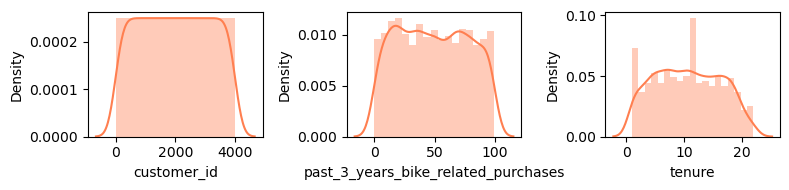

In [19]:
# distribution numerical data
plt.figure(figsize=(8, 2))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df_custdemo[nums[i]], color='coral')
    plt.tight_layout()

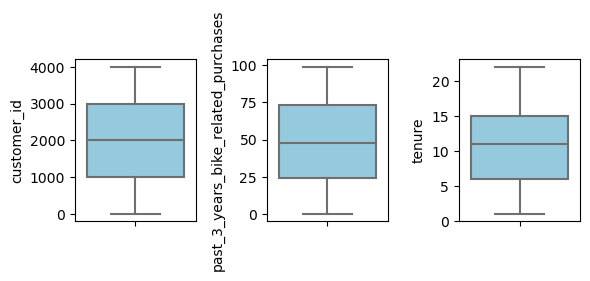

In [20]:
# distribution numerical data and check outlier
plt.figure(figsize=(6, 2))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_custdemo[nums[i]], color='skyblue', orient='v')
    plt.tight_layout()

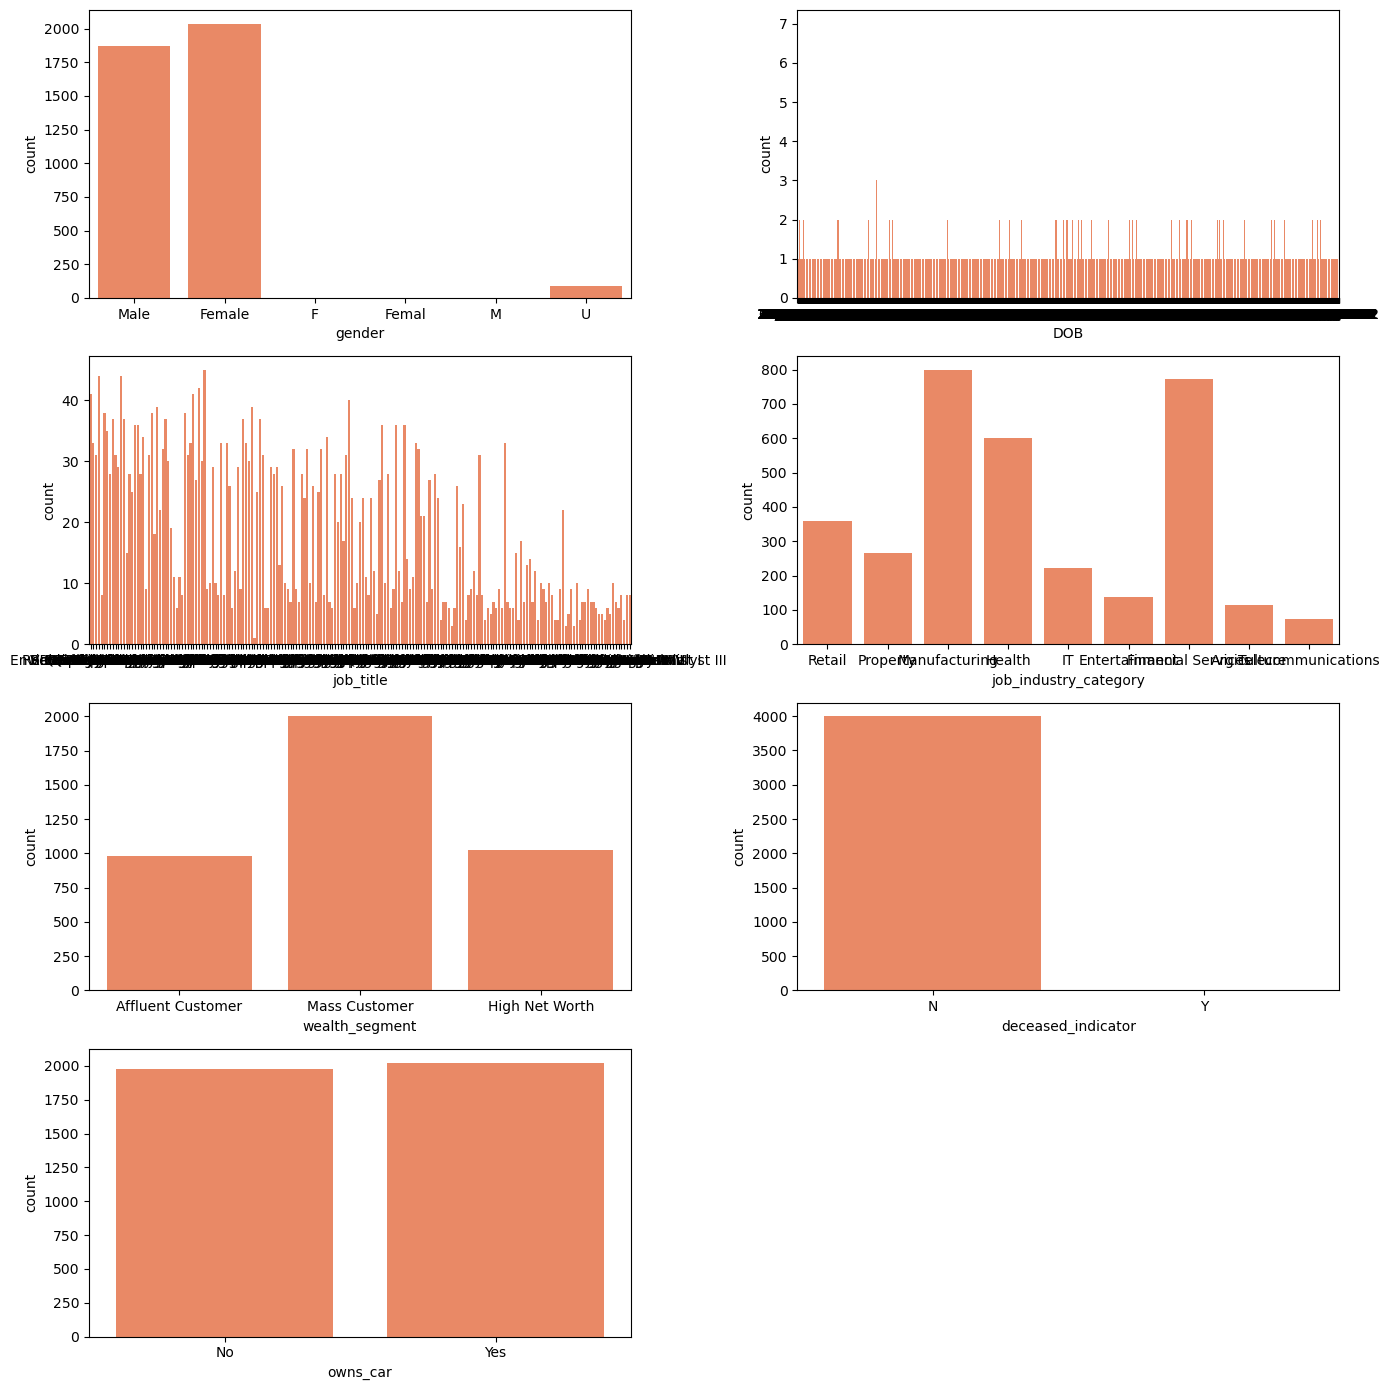

In [21]:
# visualization/countplot categorikal data
cats = ['gender', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']
plt.figure(figsize=(14, 14))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_custdemo[cats[i]], color='coral', orient='v')
    plt.tight_layout()

🔎 **summary:**

- mostly the data distribution is normal
- there not any outlier/anomaly record

## Data Cleaning

In [22]:
df_custdemo1 = df_custdemo.copy()

In [23]:
#dropping columns irrelevant
df_custdemo1. drop(columns=['default'], inplace = True)

In [24]:
df_custdemo1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [25]:
df_custdemo1.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3259,3093,Harwilll,Crimes,Male,31,01/04/1992,Mechanical Systems Engineer,Property,High Net Worth,N,Yes,6.0
2656,335,Debee,Martynov,Female,20,19/04/1983,Senior Editor,NaN,Affluent Customer,N,No,8.0
243,3581,Lindsy,Ygo,Female,38,10/07/1957,NaN,NaN,Mass Customer,N,Yes,6.0


### Handling Missing Values

In [26]:
df_custdemo1.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

**Handling NaN Values at Last names**

as we can see at there we have missing values at **the last_names.** 
and we can assume that the user don't fill columns **last_name** like the **first_names** columns
so the approach for handling this missing values, we'll fill the missing values with the **first_name.**

In [27]:
#filling the nan values at last_name with first_name
df_custdemo1['last_name'].fillna(df_custdemo1['first_name'],inplace = True)

In [28]:
df_custdemo1['last_name'].isnull().any()

False

**Handling NaN Values at DOB**

 frequency of missing values more large than mode, so I decided to **fill NaN with previous value**.

In [29]:
df_custdemo1['DOB'].fillna(method='pad',inplace=True)

**Handling NaN Values at job_title and job_industry_category**

as we can see at there, the number of missing values in this column is quite large (500+) and considering the frequency of unique values, I decided to fill NaN with previous value.

In [30]:
df_custdemo1['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Human Resources Assistant IV             4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [31]:
df_custdemo1['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [32]:
#filling the missing values NaN with the previous values
fill = ['job_title','job_industry_category']

for x in fill:
    df_custdemo1[x].fillna(method='pad',inplace=True)

**Handling NaN Values at tenure**

we'll fill the missing values NaN with the previous value.

In [33]:
df_custdemo1['tenure'].fillna(method='pad',inplace=True)

In [34]:
#checking the missing values
df_custdemo1.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

The dataset has been cleared of missing values ✅

### Handling Data Type & Incorrect Values

**gender**

In [35]:
df_custdemo1['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

<Figure size 1000x500 with 0 Axes>

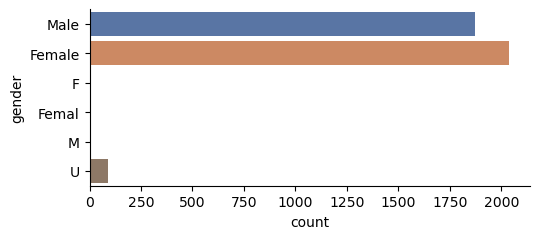

In [36]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='gender', kind='count', data=df_custdemo1, height=2.5, aspect=2.2, palette = 'deep')

In [37]:
# fixing inconsitency value
df_custdemo1.replace(to_replace= ['F', 'Femal', 'U'], value = 'Female', inplace=True)
df_custdemo1.replace(to_replace= ['M'], value = 'Male', inplace=True)

In [41]:
#checking
df_custdemo1['gender'].value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

<Figure size 1000x500 with 0 Axes>

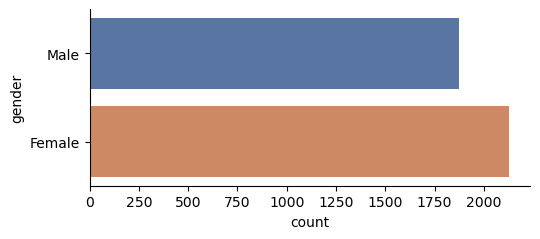

In [42]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='gender', kind='count', data=df_custdemo1, height=2.5, aspect=2.2, palette = 'deep')

**deceased indocator**

In [43]:
df_custdemo1['deceased_indicator'].replace(['Y', 'N'], ['Yes', 'No'], inplace=True)

In [45]:
# remove Yes deceased indicator
df_custdemo1[df_custdemo1['deceased_indicator'] == 'Yes']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
374,3790,Kurtis,Morson,Male,91,31/05/1959,Senior Editor,Retail,Mass Customer,Yes,Yes,9.0
1130,753,Josy,St. Quentin,Female,82,07/03/1970,Food Chemist,Health,Affluent Customer,Yes,Yes,6.0


In [ ]:
# drop colums
df_custdemo1.drop(columns='deceased_indicator', inplace=True)

In [49]:
df_custdemo1.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,720,Darrel,Canet,Male,67,23/10/1931,Recruiting Manager,Retail,Affluent Customer,No,6.0
1,1092,Katlin,Creddon,Female,56,22/08/1935,VP Quality Control,Retail,Mass Customer,No,5.0
2,3410,Merrili,Brittin,Female,93,22/09/1940,VP Quality Control,Property,Mass Customer,No,16.0


**DOB**

In [52]:
# fixing datatype
df_custdemo1['DOB'] = df_custdemo1['DOB'].astype('datetime64[ns]')

In [53]:
# create function tu calculate age
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year-birthdate.year-((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# fit into dataframe
df_custdemo1['age']=df_custdemo1['DOB'].apply(calculate_age)
df_custdemo1['age_class'] = (round(df_custdemo1['age']/ 10) * 10).astype(int)
df_custdemo1.drop(columns='age', inplace=True)

**tenure**

In [54]:
df_custdemo1['tenure'] = df_custdemo1['tenure'].astype('int64')

In [55]:
df_custdemo1.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
3108,503,Burr,Gerb,Male,87,1989-07-19,Dental Hygienist,Health,Affluent Customer,Yes,10,30
3254,3736,Charles,Brounfield,Male,64,1992-03-13,Senior Developer,Argiculture,Mass Customer,Yes,10,30
533,3310,Bethany,Jarrell,Female,83,1961-10-29,VP Marketing,Property,Affluent Customer,Yes,12,60


In [56]:
df_custdemo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   owns_car                             4000 non-null   object        
 10  tenure      

The value and data type have been correct ✅

### Save clean dataset

In [58]:
df_custdemo1.to_csv('Clean_CustomerDemographic.csv', index=False)

_____________________

## Customer Adress

### Exploratory Data Analysis

#### Checking Data Type and Unique Values

In [61]:
df_custadd.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [62]:
df_custadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [63]:
df_custadd.shape

(3999, 6)

In [64]:
# Checking unique value of each columns
for col in df_custadd.columns:
    print("{} have {} unique values: {}".format(col, df_custadd[col].nunique(), df_custadd[col].dtypes))
    if df_custadd[col].dtypes == 'int64' or df_custadd[col].dtypes == 'object':
        print("{} values: {}".format(col,df_custadd[col].unique()))
        print('')

customer_id have 3999 unique values: int64
customer_id values: [   1    2    4 ... 4001 4002 4003]

address have 3996 unique values: object
address values: ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

postcode have 873 unique values: int64
postcode values: [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263

In [65]:
# numerical data
nums_a = df_custadd.loc[:, (df_custadd.dtypes == 'int64')].columns.tolist()
print(nums_a)
print('Counts :', len(nums_a))

['customer_id', 'postcode', 'property_valuation']
Counts : 3


In [66]:
# categorical data
cats_a = df_custadd.loc[:, (df_custadd.dtypes == object)].columns.tolist()
print(cats_a)
print('Counts :', len(cats_a))

['address', 'state', 'country']
Counts : 3


🔎 **Summary :**
- The dataset consists of **3999 records** and **6 columns**, 
- as we can see, are there with **3 numerical** and **3 categorical columns**.
- The data type in each column is appropriate.
- There are inconsistent value in the **state** column, so it needs to be treated.

#### Checking Missing Values

In [69]:
# percentages missing value of dataset
nan_df = df_custadd[df_custadd.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_custadd)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 0.0 %


as we can see, in this dataframe not have missing values

####  Checking Duplicate Records 

In [71]:
df_custadd.duplicated().any()

False

🔎 **Summary :**
There is **no missing data**, and **no duplicate data**

####  Statistical Summary

In [72]:
# numerical
df_custadd[nums_a].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


In [73]:
# categorical
df_custadd[cats_a].describe().T

,count,unique,top,freq
address,3999,3996,3 Mariners Cove Terrace,2
state,3999,5,NSW,2054
country,3999,1,Australia,3999


## EDA Customer Address

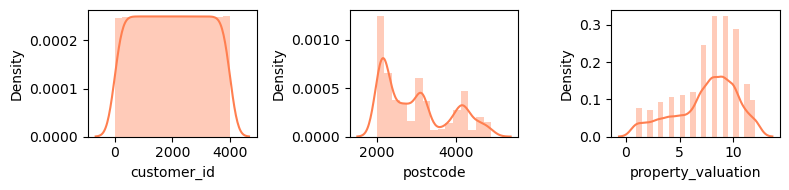

In [75]:
# distribution numerical data
plt.figure(figsize=(8, 2))
for i in range(0, len(nums_a)):
    plt.subplot(1, len(nums_a), i+1)
    sns.distplot(df_custadd[nums_a[i]], color='coral')
    plt.tight_layout()

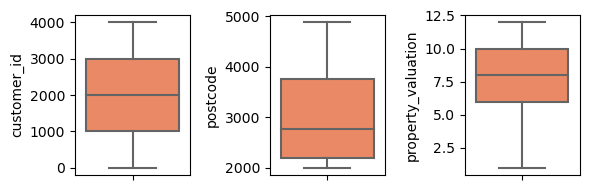

In [76]:
# distribution numerical data and check outlier
plt.figure(figsize=(6, 2))
for i in range(0, len(nums_a)):
    plt.subplot(1, len(nums_a), i+1)
    sns.boxplot(y=df_custadd[nums_a[i]], color='coral', orient='v')
    plt.tight_layout()

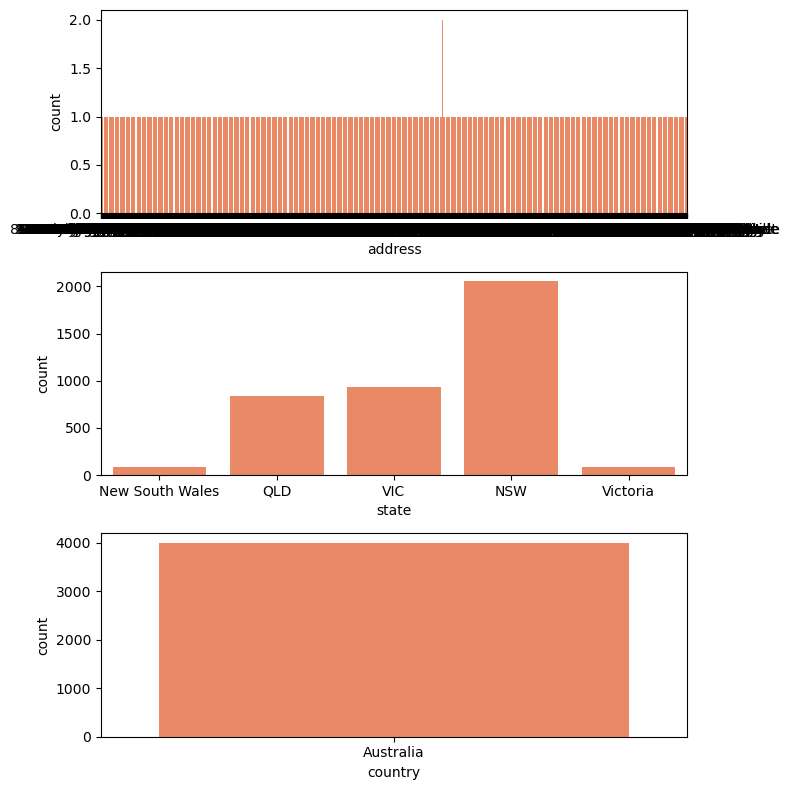

In [78]:
plt.figure(figsize=(8, 8))
for i in range(0, len(cats_a)):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=df_custadd[cats_a[i]], color='coral', orient='v')
    plt.tight_layout()

🔎 **Summary :**
- as we can see the **property_valuation** have negtively skewed.
- There are **no outlier**

## Data Cleaning

### Handling Incorrect Values

In [80]:
df_custadd1 = df_custadd.copy()

**state**

There are inconsistentcy values in columns **state**. 
So we must replace 'New South Wales' to 'NSW' and 'Victoria' to 'VIC'.

In [82]:
df_custadd1['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [83]:
# replace values
df_custadd1['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'], inplace=True)

In [84]:
df_custadd1['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

<Figure size 1000x500 with 0 Axes>

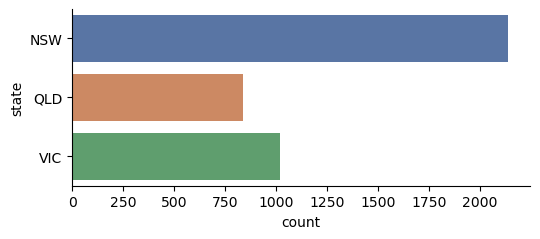

In [85]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='state', kind='count', data=df_custadd1, height=2.5, aspect=2.2, palette = 'deep')

### Save clean dataset

In [86]:
df_custdemo1.to_csv('Clean_CustomerAddress.csv', index=False)

## Transaction

### Exploratory Data Analysis

#### Checking Data Type and Unique Values

In [87]:
# sampling dataset
df_trans.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
13772,13773,32,535,26/07/2017,False,Approved,Giant Bicycles,Standard,medium,medium,"642,7","$211,37",37337.0
3365,3366,37,1153,10/01/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",35560.0
1961,1962,71,3094,22/07/2017,True,Approved,Solex,Standard,high,large,"1842,92","$1.105,75",37873.0


In [88]:
df_trans.shape

(20000, 13)

In [89]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


In [93]:
# Checking unique value from each columns
for col in df_trans.columns:
    print("{} have {} unique values: {}".format(col, df_trans[col].nunique(), df_trans[col].dtypes))
    if df_trans[col].dtypes == 'int64' or df_trans[col].dtypes == 'float' or df_trans[col].dtypes == 'object':
        print("{} values: {}".format(col,df_trans[col].unique()))
        print('')

transaction_id have 20000 unique values: int64
transaction_id values: [    1     2     3 ... 19998 19999 20000]

product_id have 101 unique values: int64
product_id values: [  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  24  53
  65  29  11  10   7  41   9  69  90  97 100  74  71  34  57  23  51  59
  63  40   8  13  30  48  68  83  43  52  85]

customer_id have 3494 unique values: int64
customer_id values: [2950 3120  402 ...  130 2789 3446]

transaction_date have 364 unique values: object
transaction_date values: ['25/02/2017' '21/05/2017' '16/10/2017' '31/08/2017' '01/10/2017'
 '08/03/2017' '21/04/2017' '15/07/2017' '10/08/2017' '30/08/2017'
 '17/01/2017' '05/01/2017' '26/02/2017' '10/09/2017' '11/06/2017'
 '10/10/2017' '03/04/2017' '02/06/2017' '06/

In [94]:
# numerical data
nums_t = df_trans.loc[:, (df_trans.dtypes == 'int64') | (df_trans.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['transaction_id', 'product_id', 'customer_id', 'product_first_sold_date']
Counts : 4


In [95]:
# categorical data
cats_t = df_trans.loc[:, (df_trans.dtypes == object)].columns.tolist() 
print(cats_t)
print('Counts :', len(cats_t))

['transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost']
Counts : 9


🔎 **Summary :**
- The dataset have **20001 records** and **26 columns**, 
- there are **18 numerical** data, and **8 categorical** data.
- **transaction_id, product_id, customer_id, product_first_sold_date** is recommended to be **integer**.
- **transaction_date** is recommended to be a **datetime**.
- **standard_cost** is recommended to be **float** and there are inconsistencies in values and unwanted characters, so treatment is needed.
- There are columns that are not relevant, so they need to be dropped.

#### Checking Missing Values

In [97]:
# checking missing value of each columns
counts = df_trans.isna().sum().sort_values(ascending=False)

# percentages of missing value
percent = round(df_trans.isna().mean()*100, 2).sort_values(ascending=False)

# create dataframe of missing value
df_demo_nan = pd.concat([counts,percent], axis=1, keys=['missing value counts', '%'])
df_demo_nan

,missing value counts,%
online_order,360,1.80
brand,197,0.98
product_line,197,0.98
product_class,197,0.98
product_size,197,0.98
standard_cost,197,0.98
product_first_sold_date,197,0.98
transaction_id,0,0.00
product_id,0,0.00
customer_id,0,0.00


In [100]:
# percentages missing value of dataset
nan_df = df_trans[df_trans.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_trans)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 2.77 %


#### Checking Duplicate Values

In [102]:
df_trans.duplicated().any()

False

🔎 **Summary :**
There are a missing values of **less than 10%**. 
and there are no duplicate data. 
So I decided to drop it, as it is still safe and does not affect the analysis significantly.

#### Statistical Summary

In [103]:
# numerical value
df_trans[nums_t].describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.0,10000.500000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
product_id,20000.0,45.364650,30.753590,0.0,18.00,44.0,72.00,100.0
customer_id,20000.0,1738.246050,1011.951046,1.0,857.75,1736.0,2613.00,5034.0
product_first_sold_date,19803.0,38199.776549,2875.201110,33259.0,35667.00,38216.0,40672.00,42710.0


In [105]:
# categorical value
df_trans[cats_t].describe().T

,count,unique,top,freq
transaction_date,20000,364,14/02/2017,82
online_order,19640,2,True,9829
order_status,20000,2,Approved,19821
brand,19803,6,Solex,4253
product_line,19803,4,Standard,14176
product_class,19803,3,medium,13826
product_size,19803,3,medium,12990
list_price,20000,296,"2091,47",465
standard_cost,19803,103,"$388,92",465


#### Checking Distribution

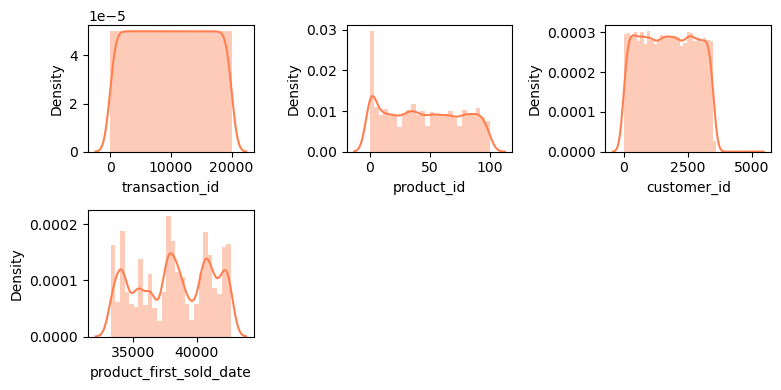

In [110]:
# distribution numerical data
nums_t = ['transaction_id', 'product_id', 'customer_id', 'product_first_sold_date']
plt.figure(figsize=(8, 4))
for i in range(0, len(nums_t)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df_trans[nums_t[i]], color='coral')
    plt.tight_layout()

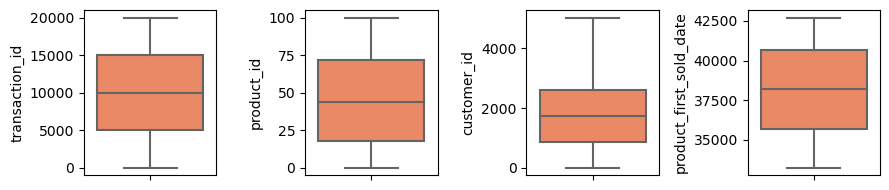

In [113]:
# distribution numerical data and check outlier
plt.figure(figsize=(9, 2))
for i in range(0, len(nums_t)):
    plt.subplot(1, len(nums_t), i+1)
    sns.boxplot(y=df_trans[nums_t[i]], color='coral', orient='v')
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(14, 14))
for i in range(0, len(cats_t)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_trans[cats_t[i]], color='coral', orient='v')
    plt.tight_layout()

### Data Cleaning

#### Dropping Irrelevan Columns

In [115]:
df_trans1 = df_trans.copy()

In [116]:
df_trans1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [117]:
# checking
df_trans1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

The dataset has been cleared of irrelevant columns ✅

#### Handling Missing values

In [119]:
df_trans1.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [120]:
# drop missing value
df_trans1.dropna(inplace=True)

In [121]:
# checking
df_trans1.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

The dataset has been cleared of missing values ✅

#### Handling Data Type & Incorrect Values

> **transaction_id, product_id, customer_id, product_first_sold_date**

replace from float to interger

In [122]:
# changing to integer
col_int = ['transaction_id', 'product_id', 'customer_id', 'product_first_sold_date']
df_trans1[col_int] = df_trans1[col_int].astype('int64')

> **standard_cost**

removing character : '$' and ','
changing datatype to float

In [123]:
# removing unwanted character in columns
df_trans1['standard_cost'] = df_trans1['standard_cost'].str.replace('$','')
df_trans1['standard_cost'] = df_trans1['standard_cost'].str.replace(',','')

In [124]:
# changing to float
df_trans1['standard_cost'] = df_trans1['standard_cost'].astype('float64')

> **transactions_date**


In [126]:
# changing datatype transaction date
import datetime as dt

df_trans1['transaction_date'] = df_trans1['transaction_date'].astype('datetime64[ns]')
df_trans1['transaction_date'] = df_trans1['transaction_date'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

> **product_first_sold_date**


In [128]:
# unix time values to datetime
df_trans1['product_first_sold_date'] = pd.TimedeltaIndex(df_trans1['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [129]:
#sampling dataset
df_trans1.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19142,19143,58,1748,2017-07-27,True,Approved,OHM Cycles,Standard,medium,medium,"912,52",14140.0,2010-11-07
2326,2327,23,858,2017-12-19,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46",38110.0,1999-07-28
8740,8741,73,2555,2017-05-27,True,Approved,Solex,Standard,medium,medium,"1945,43",33318.0,2002-09-02


> **order_status**


In [131]:
df_trans1[df_trans1['order_status']=='Cancelled'].sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4437,4438,18,2253,2017-08-14,True,Cancelled,Solex,Standard,medium,medium,"575,27",43145.0,2009-03-10
19272,19273,23,2738,2017-08-13,True,Cancelled,Norco Bicycles,Mountain,low,small,"688,63",61288.0,1993-10-04


In the order_status column with the **Cancelled value**, it can be assumed that the **transaction was canceled so the company did not get revenue**. We decide to delete the data record that has the Cancelled value and then we drop the column. The data retrieved is the successful transaction data.

In [132]:
# deleting rows that order status is cancelled -> not generate revenue
df_trans1 = df_trans1[df_trans1['order_status']!='Cancelled']

In [133]:
# remove columns order status
df_trans1.drop(columns=['order_status'], inplace=True)

In [134]:
df_trans1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19273 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19273 non-null  int64         
 1   product_id               19273 non-null  int64         
 2   customer_id              19273 non-null  int64         
 3   transaction_date         19273 non-null  datetime64[ns]
 4   online_order             19273 non-null  object        
 5   brand                    19273 non-null  object        
 6   product_line             19273 non-null  object        
 7   product_class            19273 non-null  object        
 8   product_size             19273 non-null  object        
 9   list_price               19273 non-null  object        
 10  standard_cost            19273 non-null  float64       
 11  product_first_sold_date  19273 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)

The dataset has been cleared ✅

### Save Clean Dataset

In [135]:
df_trans1.to_csv('CLEAN_Transaction_.csv', index=False)

**Getting transaction data in the past three months**

In [136]:
# sorting by latest date
df_trans1 = df_trans1.sort_values(by='transaction_date', ascending=False)

In [138]:
# filtering data in the past three months
df_tran_latest = df_trans1[(df_trans1['transaction_date'] >= '2017-10-01') & (df_trans1['transaction_date'] <= '2017-12-30')]
df_tran_latest

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
16257,16258,14,2055,2017-12-30,True,Solex,Standard,high,large,"1842,92",1.10575,1995-10-26
8110,8111,79,1970,2017-12-30,True,Norco Bicycles,Standard,medium,medium,"1555,58",81801.00000,2003-09-11
5041,5042,90,1985,2017-12-30,False,Norco Bicycles,Standard,low,medium,"363,01",29041.00000,1999-07-28
1696,1697,56,2421,2017-12-30,True,OHM Cycles,Standard,medium,medium,"183,86",13790.00000,1991-01-23
7310,7311,1,1328,2017-12-30,False,Giant Bicycles,Standard,medium,medium,"1403,5",95482.00000,2012-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...
16553,16554,62,2001,2017-10-01,True,Solex,Standard,medium,medium,"478,16",29872.00000,2014-03-05
7172,7173,39,1541,2017-10-01,False,Giant Bicycles,Standard,medium,large,"1812,75",58248.00000,2007-12-13
12233,12234,0,1310,2017-10-01,True,Trek Bicycles,Road,medium,medium,"533,51",40013.00000,2012-06-06
4363,4364,52,1147,2017-10-01,False,Solex,Road,medium,large,"1777,8",82078.00000,1991-08-07


In [139]:
# cheking date
df_tran_latest['transaction_date']

16257   2017-12-30
8110    2017-12-30
5041    2017-12-30
1696    2017-12-30
7310    2017-12-30
           ...    
16553   2017-10-01
7172    2017-10-01
12233   2017-10-01
4363    2017-10-01
12001   2017-10-01
Name: transaction_date, Length: 4885, dtype: datetime64[ns]

In [140]:
# saving dataset
df_tran_latest.to_csv('Transaction_3months_CLEAN.csv', index=False)

In [141]:
df_tran_latest.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
16257,16258,14,2055,2017-12-30,True,Solex,Standard,high,large,"1842,92",1.10575,1995-10-26
8110,8111,79,1970,2017-12-30,True,Norco Bicycles,Standard,medium,medium,"1555,58",81801.00000,2003-09-11
5041,5042,90,1985,2017-12-30,False,Norco Bicycles,Standard,low,medium,"363,01",29041.00000,1999-07-28
1696,1697,56,2421,2017-12-30,True,OHM Cycles,Standard,medium,medium,"183,86",13790.00000,1991-01-23
7310,7311,1,1328,2017-12-30,False,Giant Bicycles,Standard,medium,medium,"1403,5",95482.00000,2012-09-17


In [142]:
df_tran_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4885 entries, 16257 to 12001
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           4885 non-null   int64         
 1   product_id               4885 non-null   int64         
 2   customer_id              4885 non-null   int64         
 3   transaction_date         4885 non-null   datetime64[ns]
 4   online_order             4885 non-null   object        
 5   brand                    4885 non-null   object        
 6   product_line             4885 non-null   object        
 7   product_class            4885 non-null   object        
 8   product_size             4885 non-null   object        
 9   list_price               4885 non-null   object        
 10  standard_cost            4885 non-null   float64       
 11  product_first_sold_date  4885 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64